# Filtering Data by Sports Games

Adding an indicator column to the main dataset that indicates whether a game (for given sport) took place at the date of a stop.

The stops dataset should look like the below, with 2 indicator columns added at the end for each sport:

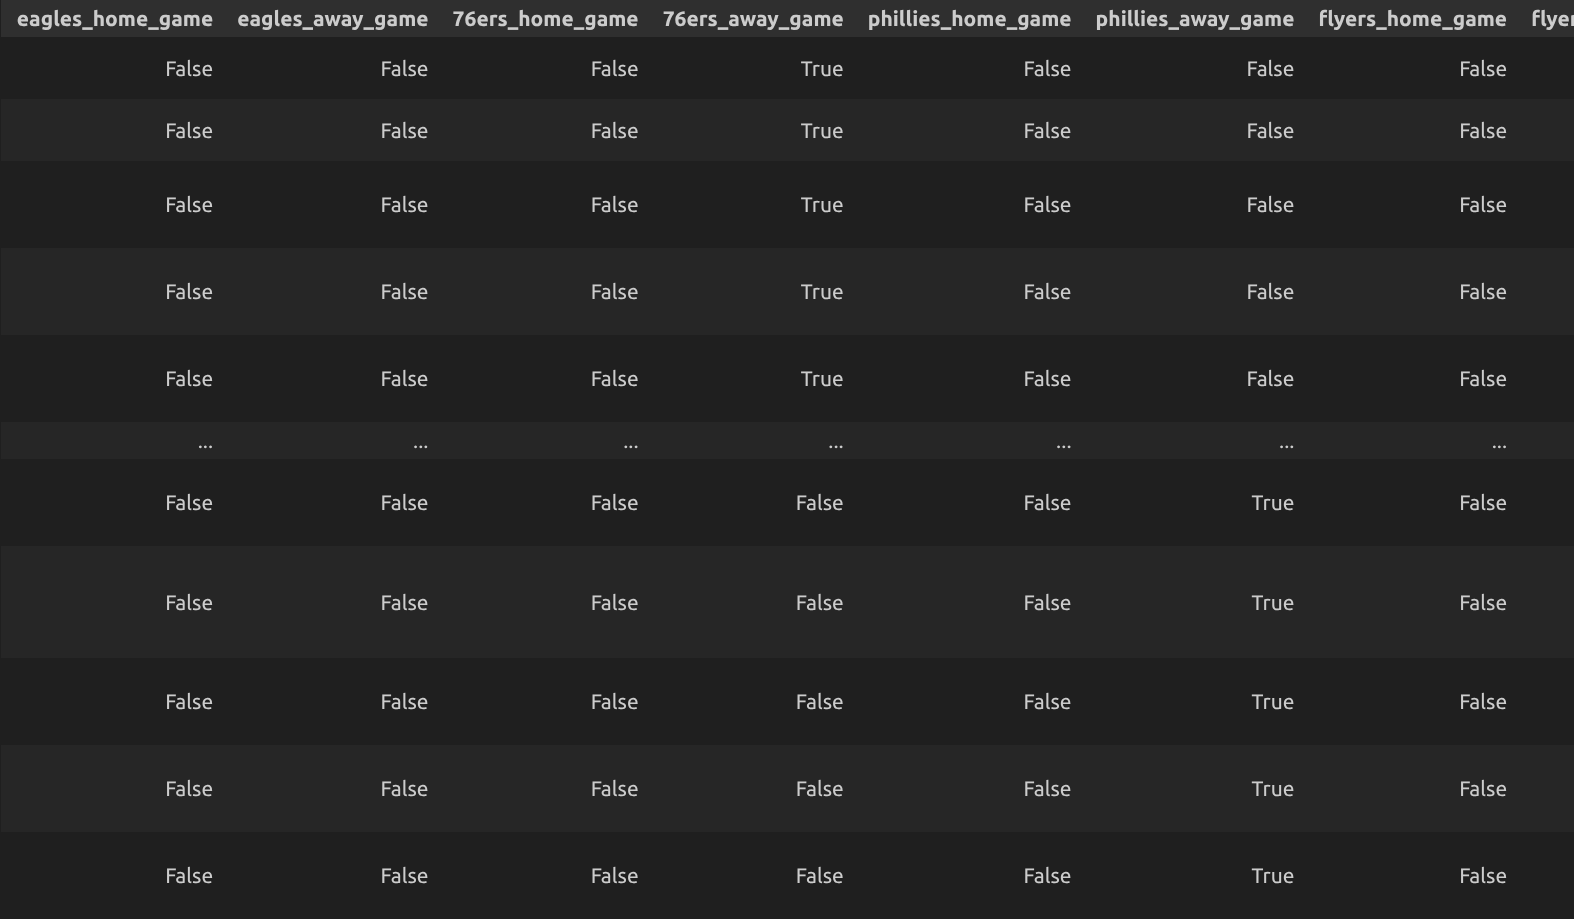

In [1]:
import pandas as pd

In [7]:
DATA = pd.read_csv("pa_philadelphia_2020_04_01.csv")
DATA

/tmp/ipykernel_660743/2864528812.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  DATA = pd.read_csv("pa_philadelphia_2020_04_01.csv")


,raw_row_number,date,time,location,lat,lng,district,service_area,subject_age,subject_race,...,arrest_made,outcome,contraband_found,frisk_performed,search_conducted,search_person,search_vehicle,raw_race,raw_individual_contraband,raw_vehicle_contraband
0,411981,2014-01-01,01:14:00,NaN,NaN,NaN,19.0,191,31.0,black,...,True,arrest,True,False,True,True,False,Black - Non-Latino,True,False
1,407442,2014-01-01,01:57:00,NaN,NaN,NaN,12.0,121,21.0,black,...,True,arrest,False,True,True,True,False,Black - Non-Latino,False,False
2,217556,2014-01-01,03:30:00,3400 BLOCK SPRUCE ST,39.950424,-75.192680,18.0,183,24.0,black,...,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False
3,217557,2014-01-01,03:40:00,3400 BLOCK SPRUCE ST,39.950424,-75.192680,18.0,183,20.0,black,...,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False
4,230988,2014-01-01,08:30:00,N 56TH ST / UPLAND WAY,39.983712,-75.234188,19.0,193,31.0,black,...,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865091,1791698,2018-04-14,21:36:00,S 59TH ST / ELMWOOD AV,39.928084,-75.221956,12.0,123,60.0,black,...,False,NaN,NaN,False,False,False,False,Black - Non-Latino,False,False
1865092,1789312,2018-04-14,22:01:00,2600 BLOCK JUDSON ST,39.998242,-75.175190,39.0,393,33.0,asian/pacific islander,...,False,NaN,NaN,False,False,False,False,Asian,False,False
1865093,1791237,2018-04-14,22:48:00,500 BLOCK E OLNEY AV,40.033812,-75.114429,35.0,352,21.0,black,...,True,arrest,False,True,True,True,False,Black - Non-Latino,False,False
1865094,1791243,2018-04-14,22:48:00,500 BLOCK E OLNEY AV,40.033812,-75.114429,35.0,352,22.0,black,...,True,arrest,False,True,True,True,False,Black - Non-Latino,False,False


In [5]:
# Eagles
eagles = pd.read_csv("EAGLES_SCHEDULE_CLEANED.csv")
eagles

,Season,Year,Week,Day,FullDate,FullTime,Home,Opp,W,TeamScore,OppScore,Differential
0,2014,2014,1,Sun,2014-09-07,13:02:00,0,Jacksonville Jaguars,1,34.0,17.0,17.0
1,2014,2014,2,Mon,2014-09-15,20:31:00,1,Indianapolis Colts,1,30.0,27.0,3.0
2,2014,2014,3,Sun,2014-09-21,13:02:00,0,Washington Redskins,1,37.0,34.0,3.0
3,2014,2014,4,Sun,2014-09-28,16:25:00,1,San Francisco 49ers,0,21.0,26.0,-5.0
4,2014,2014,5,Sun,2014-10-05,13:02:00,0,St. Louis Rams,1,34.0,28.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
80,2018,2018,15,Sun,2018-12-16,20:20:00,1,Los Angeles Rams,1,30.0,23.0,7.0
81,2018,2018,16,Sun,2018-12-23,13:00:00,0,Houston Texans,1,32.0,30.0,2.0
82,2018,2018,17,Sun,2018-12-30,16:25:00,1,Washington Redskins,1,24.0,0.0,24.0
83,2018,2019,Wild Card,Sun,2019-01-06,16:40:00,1,Chicago Bears,1,16.0,15.0,1.0


In [9]:
# convert dates to datetime
eagles["FullDate"] = pd.to_datetime(eagles["FullDate"])
DATA["date"] = pd.to_datetime(DATA["date"])

In [17]:
def add_game_indicator_col(game_dates, new_col_name):

    # Adds an indicator column "new_col_name" in DATA 
    # that indicates whether a game took place on the
    # date of each stop

    # Args:
        # game_dates: the unique game dates for a given
            # sport/filter
        # new_col_name: the name of the new column

    mask = DATA["date"].isin(game_dates)
    DATA[new_col_name] = mask

    return DATA

In [19]:
# EAGLES: 
    # unique home game dates
eagles_home_mask = eagles["Home"] == 1
eagles_home_dates = eagles[eagles_home_mask]["FullDate"].unique()
    # unique away game dates
eagles_away_dates = eagles[~eagles_home_mask]["FullDate"].unique()

In [20]:
DATA = add_game_indicator_col(game_dates=eagles_home_dates, 
                              new_col_name="eagles_home_game")
DATA = add_game_indicator_col(game_dates=eagles_away_dates, 
                              new_col_name="eagles_away_game")

In [23]:
sum(DATA["eagles_away_game"]), sum(DATA["eagles_home_game"])

(34845, 32728)

In [30]:
philly76ers = pd.read_csv("Philly76.csv")
philly76ers["Date"] = pd.to_datetime(philly76ers["Date"])
philly76ers

,Game,Date,Start (ET),HomeAway,Opponent,WinLoss,OT,Tm,Opp,W,L,Streak,Attend.,LOG
0,31,2014-01-01,9:00p,@,Denver Nuggets,W,NaN,114,102,10,21,W 2,16006,2:14:00 AM
1,32,2014-01-02,10:00p,@,Sacramento Kings,W,NaN,113,104,11,21,W 3,16259,2:23:00 AM
2,33,2014-01-04,10:00p,@,Portland Trail Blazers,W,NaN,101,99,12,21,W 4,20004,2:25:00 AM
3,34,2014-01-06,7:00p,NaN,Minnesota Timberwolves,L,NaN,95,126,12,22,L 1,10736,2:01:00 AM
4,35,2014-01-07,7:00p,@,Cleveland Cavaliers,L,NaN,93,111,12,23,L 2,13344,2:07:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,78,2018-04-04,7:00p,@,Detroit Pistons,W,NaN,115,108,48,30,W 12,18395,2:11:00 AM
376,79,2018-04-06,7:00p,NaN,Cleveland Cavaliers,W,NaN,132,130,49,30,W 13,20769,2:26:00 AM
377,80,2018-04-08,1:00p,NaN,Dallas Mavericks,W,NaN,109,97,50,30,W 14,20846,2:02:00 AM
378,81,2018-04-10,7:30p,@,Atlanta Hawks,W,NaN,121,113,51,30,W 15,15673,2:20:00 AM


In [31]:
# 76ers: 
    # unique home game dates
s76ers_home_mask = philly76ers["HomeAway"] != "@"
s76ers_home_dates = philly76ers[s76ers_home_mask]["Date"].unique()
    # unique away game dates
s76_away_dates = philly76ers[~s76ers_home_mask]["Date"].unique()

In [32]:
DATA = add_game_indicator_col(game_dates=s76ers_home_dates, 
                              new_col_name="76ers_home_game")
DATA = add_game_indicator_col(game_dates=s76_away_dates, 
                              new_col_name="76ers_away_game")

In [40]:
phillies = pd.read_csv("Phillies_2014_2018.csv")
# if there is a double-header, it is indicated by (1) or (2) after 
# the date; I'm removing this for the purpose of date tracking
phillies["Date"] = phillies["Date"].str.replace(r'\s+\(.*?\)', '', 
                                                regex=True)
phillies["FullDate"] = pd.to_datetime(phillies["Date"] + " " + phillies["Year"].astype(str), 
                                      format='%A %b %d %Y')
phillies

,Gm.,Date,X,Tm,X.1,Opp,W.L,R,RA,Inn,...,Loss,Save,Time,D.N,Attendance,cLI,Streak,Orig..Scheduled,Year,FullDate
0,1,Monday Mar 31,boxscore,PHI,@,TEX,W,14,10,NaN,...,Figueroa,NaN,3:36,D,49031.0,0.96,+,NaN,2014,2014-03-31
1,2,Tuesday Apr 1,boxscore,PHI,@,TEX,L-wo,2,3,NaN,...,Hollands,NaN,3:14,N,29530.0,0.98,-,NaN,2014,2014-04-01
2,3,Wednesday Apr 2,boxscore,PHI,@,TEX,L-wo,3,4,NaN,...,Papelbon,NaN,3:02,N,28218.0,0.88,--,NaN,2014,2014-04-02
3,4,Friday Apr 4,boxscore,PHI,@,CHC,W,7,2,NaN,...,Wood,NaN,3:16,D,38283.0,0.88,+,NaN,2014,2014-04-04
4,5,Saturday Apr 5,boxscore,PHI,@,CHC,W,2,0,NaN,...,Samardzija,Papelbon,2:53,D,30651.0,0.92,++,NaN,2014,2014-04-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,158,Wednesday Sep 26,boxscore,PHI,@,COL,L,0,14,NaN,...,Pivetta,NaN,2:51,N,35181.0,0.00,-------,NaN,2018,2018-09-26
806,159,Thursday Sep 27,boxscore,PHI,@,COL,L,3,5,NaN,...,Arrieta,Davis,3:06,D,36448.0,0.00,--------,NaN,2018,2018-09-27
807,160,Friday Sep 28,boxscore,PHI,NaN,ATL,L,2,10,NaN,...,Eickhoff,NaN,3:42,N,24306.0,0.00,---------,NaN,2018,2018-09-28
808,161,Saturday Sep 29,boxscore,PHI,NaN,ATL,W,3,0,NaN,...,Venters,Domínguez,2:43,N,30886.0,0.00,+,NaN,2018,2018-09-29


In [46]:
# phillies: 
    # unique home game dates
phillies_home_mask = phillies["X.1"] != "@"
phillies_home_dates = phillies[phillies_home_mask]["FullDate"].unique()
    # unique away game dates
phillies_away_dates = phillies[~phillies_home_mask]["FullDate"].unique()

In [47]:
DATA = add_game_indicator_col(game_dates=phillies_home_dates, 
                              new_col_name="phillies_home_game")
DATA = add_game_indicator_col(game_dates=phillies_away_dates, 
                              new_col_name="phillies_away_game")

In [ ]:
flyers = pd.read_csv("Flyers.csv")
flyers["Date"] = pd.to_datetime(flyers["Date"])
flyers

,GP,Date,HomeAway,Opponent,GF,GA,WinLoss,OTSO,W,L,OL,Streak,Attend.,LOG
0,41,2014-01-02,@,Colorado Avalanche,1,2,L,NaN,20,17,4,L 1,NaN,NaN
1,42,2014-01-04,@,Phoenix Coyotes,5,3,W,NaN,21,17,4,W 1,NaN,NaN
2,43,2014-01-07,@,New Jersey Devils,3,2,W,OT,22,17,4,W 2,NaN,NaN
3,44,2014-01-08,NaN,Montreal Canadiens,3,1,W,NaN,23,17,4,W 3,NaN,NaN
4,45,2014-01-11,NaN,Tampa Bay Lightning,3,6,L,NaN,23,18,4,L 1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,2,2018-04-13,@,Pittsburgh Penguins,5,1,W,NaN,1,1,W 1,18648,2:35,NaN
385,3,2018-04-15,NaN,Pittsburgh Penguins,1,5,L,NaN,1,2,L 1,19955,2:32,NaN
386,4,2018-04-18,NaN,Pittsburgh Penguins,0,5,L,NaN,1,3,L 2,19644,2:26,NaN
387,5,2018-04-20,@,Pittsburgh Penguins,4,2,W,NaN,2,3,W 1,18632,2:31,NaN


In [50]:
# flyers: 
    # unique home game dates
flyers_home_mask = flyers["HomeAway"] != "@"
flyers_home_dates = flyers[flyers_home_mask]["Date"].unique()
    # unique away game dates
flyers_away_dates = flyers[~flyers_home_mask]["Date"].unique()

In [52]:
DATA = add_game_indicator_col(game_dates=flyers_home_dates, 
                              new_col_name="flyers_home_game")
DATA = add_game_indicator_col(game_dates=flyers_away_dates, 
                              new_col_name="flyers_away_game")

In [53]:
DATA

,raw_row_number,date,time,location,lat,lng,district,service_area,subject_age,subject_race,...,raw_individual_contraband,raw_vehicle_contraband,eagles_home_game,eagles_away_game,76ers_home_game,76ers_away_game,phillies_home_game,phillies_away_game,flyers_home_game,flyers_away_game
0,411981,2014-01-01,01:14:00,NaN,NaN,NaN,19.0,191,31.0,black,...,True,False,False,False,False,True,False,False,False,False
1,407442,2014-01-01,01:57:00,NaN,NaN,NaN,12.0,121,21.0,black,...,False,False,False,False,False,True,False,False,False,False
2,217556,2014-01-01,03:30:00,3400 BLOCK SPRUCE ST,39.950424,-75.192680,18.0,183,24.0,black,...,False,False,False,False,False,True,False,False,False,False
3,217557,2014-01-01,03:40:00,3400 BLOCK SPRUCE ST,39.950424,-75.192680,18.0,183,20.0,black,...,False,False,False,False,False,True,False,False,False,False
4,230988,2014-01-01,08:30:00,N 56TH ST / UPLAND WAY,39.983712,-75.234188,19.0,193,31.0,black,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865091,1791698,2018-04-14,21:36:00,S 59TH ST / ELMWOOD AV,39.928084,-75.221956,12.0,123,60.0,black,...,False,False,False,False,False,False,False,True,False,False
1865092,1789312,2018-04-14,22:01:00,2600 BLOCK JUDSON ST,39.998242,-75.175190,39.0,393,33.0,asian/pacific islander,...,False,False,False,False,False,False,False,True,False,False
1865093,1791237,2018-04-14,22:48:00,500 BLOCK E OLNEY AV,40.033812,-75.114429,35.0,352,21.0,black,...,False,False,False,False,False,False,False,True,False,False
1865094,1791243,2018-04-14,22:48:00,500 BLOCK E OLNEY AV,40.033812,-75.114429,35.0,352,22.0,black,...,False,False,False,False,False,False,False,True,False,False


In [54]:
# store updated dataset to CSV locally
DATA.to_csv("PHILLY_STOPS_DATA_WITH_GAME_INDICATORS.csv", index=False)